# Statements to investigate

1. How does the number of impressions relate to the number of engagements (comments, likes, shares, etc.)?
2. Is there a correlation between the length of the message text and the engagement it receives?
3. What are the most common hashtags used in the posts and how do they impact engagement?
4. Is there a relationship between the day of the week a post is made and the number of impressions it receives?
5. Does the presence of an image in a post influence the level of engagement?
6. How do the different engagement metrics (comments, likes, shares, etc.) vary over time (by date or hour of posting)?
7. Are certain fanpages consistently performing better in terms of impressions, engagement, or other metrics?
8. Is there a relationship between the age of a post (days since posted) and the level of engagement it receives?
9. What is the average number of engagements (comments, likes, shares, etc.) per post?
10. Can sentiment analysis be performed on the cleaned and translated text to determine the overall sentiment of the posts?
11. Is there a relationship between post length and the use of hashtags?
12. Are there any specific trends or patterns in the engagement metrics based on the time of day t posted (hm_posted or hour_posted).
13. What is the distribution of engagement metrics (comments, likes, shares, etc.) across all posts?
14. Are there any outliers in terms of impressions, engagements, or other metrics?
15. Can we identify any specific trends or patterns in the data based on the date or month of the posts?
16. Is there a correlation between the number of impressions and the number of shares?
17. What is the average engagement per impression ratio?
18. Can we identify any influential factors (such as specific hashtags, fanpage, or post length) that significantly affect engagement levels?
19. Are there any specific days of the week that consistently generate higher engagement levels?
20. Is there a relationship between the number of other engagements (e.g., clicks, video views) and the overall engagement of a post?

These statements can be investigated and answered by performing data analysis on the provided dataset. The analysis may involve exploring statistical relationships, visualizations, correlations, trend analyses, and looking for patterns or insights within the data.he post was

In [90]:
import os
import dotenv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Load environment variables
project_dir = os.path.join(os.path.abspath(''), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')

dotenv.load_dotenv(dotenv_path)

True

In [92]:
df = pd.read_csv(os.path.join(os.getenv('SAVE_INTERIM_FILES_PATH'), 'data_message_texts_ready_to_topic_modelling.csv'), encoding='utf-8')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85874 entries, 0 to 85873
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Message Text               85874 non-null  object 
 1   Date                       85874 non-null  object 
 2   Impressions                85874 non-null  float64
 3   Comments                   3817 non-null   float64
 4   Likes                      31880 non-null  float64
 5   Shares                     8472 non-null   float64
 6   Other Engagements          34727 non-null  float64
 7   Engagements                41677 non-null  float64
 8   days_since_posted          85874 non-null  float64
 9   fanpage_id                 85874 non-null  float64
 10  ID                         85874 non-null  object 
 11  has_any_image              85874 non-null  bool   
 12  hashtags                   74774 non-null  object 
 13  has_any_hashtag            85874 non-null  boo

In [94]:
cols_to_sum = ['Impressions', 'Comments', 'Likes', 'Shares', 'Other Engagements', 'Engagements']
agg_method = {k: 'sum' if k in cols_to_sum else 'first' for k in df.columns}
df_agg = df.groupby('ID').agg(agg_method).drop(columns=['ID']).reset_index()
df_agg.head(5)

,ID,Message Text,Date,Impressions,Comments,Likes,Shares,Other Engagements,Engagements,days_since_posted,fanpage_id,has_any_image,hashtags,has_any_hashtag,dow_posted,post_len,timestamp_posted,hm_posted,hour_posted,text_clean_and_translated
0,urn:li:share:7015109880122384384,Wir wünschen euch allen ein glückliches und ge...,2023-03-15 00:00:00,2498.0,0.0,60.0,1.0,8.0,69.0,73.0,154517.0,False,"frohesneues,happynewyear,mehralsgeld,meinebank...",True,Sunday,213,2023-01-01 01:22:10.005,01:22,1,We wish you all a happy and healthy 2023. Tack...
1,urn:li:share:7015180072244367361,Happy New Year from everyone at Bosch #Rexroth...,2023-01-06 00:00:00,626.0,1.0,19.0,1.0,7.0,28.0,5.0,50.0,True,"Hägglunds,Rexroth,WeMoveYouWin",True,Sunday,266,2023-01-01 06:01:05.182,06:01,6,happy new year from everyone at bosch and we h...
2,urn:li:share:7015210047886524416,Are you ready for 2023? ✨🥂🚀 We are! 🙌 As we w...,2023-01-02 00:00:00,64923.0,9.0,1581.0,65.0,992.0,2647.0,1.0,118.0,True,None,False,Sunday,330,2023-01-01 08:00:11.861,08:00,8,are you ready for 2023 we are as we welcome th...
3,urn:li:share:7015240414274158592,We at Krones hope you had a wonderful New Year...,2023-01-06 00:00:00,15283.0,4.0,348.0,16.0,112.0,480.0,5.0,2165.0,True,None,False,Sunday,189,2023-01-01 10:00:51.753,10:00,10,we at krones hope you had a wonderful new year...
4,urn:li:share:7015249631085240320,Happy New Year to all of you!,2023-01-01 00:00:00,8036.0,0.0,331.0,23.0,98.0,452.0,0.0,138174.0,True,None,False,Sunday,29,2023-01-01 10:37:29.286,10:37,10,happy new year to all of you


In [95]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4281 non-null   object 
 1   Message Text               4281 non-null   object 
 2   Date                       4281 non-null   object 
 3   Impressions                4281 non-null   float64
 4   Comments                   4281 non-null   float64
 5   Likes                      4281 non-null   float64
 6   Shares                     4281 non-null   float64
 7   Other Engagements          4281 non-null   float64
 8   Engagements                4281 non-null   float64
 9   days_since_posted          4281 non-null   float64
 10  fanpage_id                 4281 non-null   float64
 11  has_any_image              4281 non-null   bool   
 12  hashtags                   3423 non-null   object 
 13  has_any_hashtag            4281 non-null   bool 

A:\git_projects\machine-learning-project\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
A:\git_projects\machine-learning-project\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Correlation coefficient(in %): 20.31


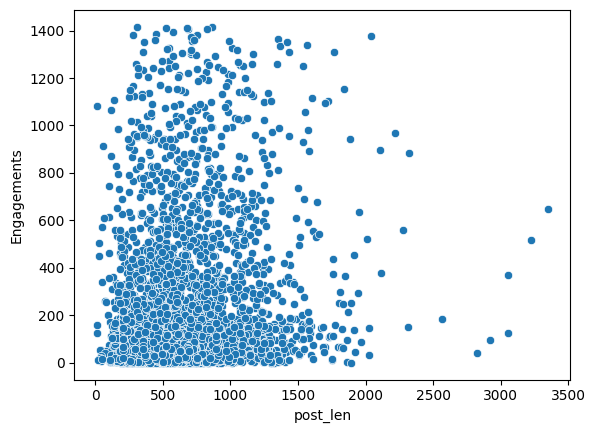

In [96]:
# Define the percentile to exclude outliers
# Calculate the threshold for excluding outliers
engagements_threshold = np.percentile(df_agg["Engagements"], 90)
# Filter out posts with engagements above the threshold
filtered_df = df_agg[df_agg["Engagements"] <= engagements_threshold]

# Calculate the correlation between message length and engagements after filtering outliers
correlation = filtered_df["post_len"].corr(filtered_df["Engagements"])

# Visualize the correlation using a scatterplot
sns.scatterplot(data=filtered_df, x="post_len", y="Engagements")

# Display the correlation coefficient
print("Correlation coefficient(in %):", round(correlation*100, 2))

In [97]:
engagement_metrics = ['Comments', 'Likes', 'Shares', 'Other Engagements']

<Axes: >

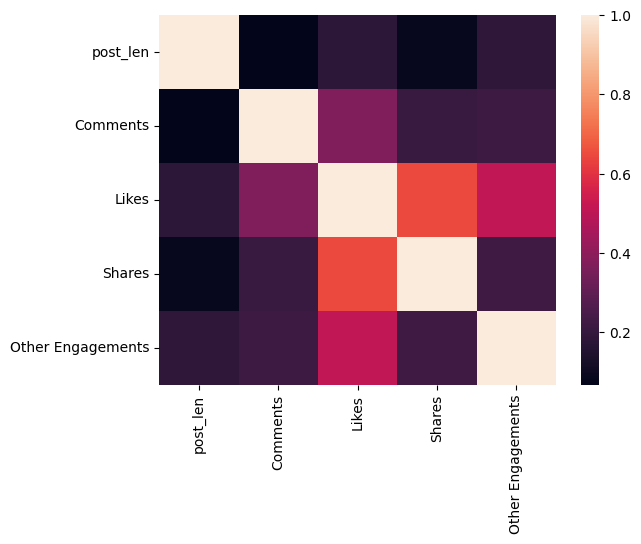

In [98]:
corr = filtered_df.loc[:, ['post_len']+engagement_metrics].astype(int).corr()

# plot the heatmap
sns.heatmap(corr)

Takeaways from heatmap between post length and engagement metrics:
- length of a post is barely correlated with engagements (only 20%)
- Comments and Likes are somehow correlated
- Shares and Likes are pretty well correlated

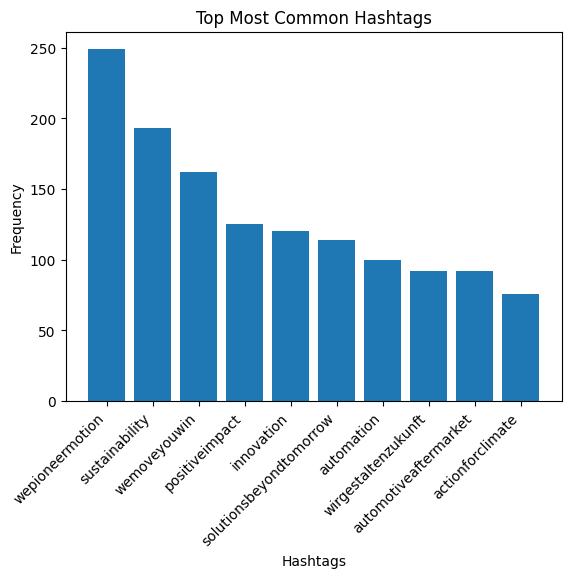

In [99]:
hashtags = df_agg["hashtags"]

# Count the frequency of each hashtag:
hashtags_counts = hashtags.str.split(',').explode().str.lower().value_counts()
# filter out company based hashtags
hashtags_counts = hashtags_counts[
    ~hashtags_counts.index.isin(
        os.getenv('COMPANIES').lower().split(',') + ['boschrexroth', 'krones', 'weareschaeffler', 'eon']
    )
]
# Determine the top most common hashtags:
top_hashtags = hashtags_counts.head(10)  # Change 10 to the desired number of top hashtags you want to analyze
# Plot the top hashtags using a bar chart or any visualization of your choice:
plt.bar(top_hashtags.index, top_hashtags.values)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.title("Top Most Common Hashtags")
plt.xticks(rotation=45, ha='right')
plt.show()

In [100]:
df_agg_hashtags = df_agg.copy()
df_agg_hashtags.loc[:, 'hashtags'] = df_agg_hashtags.hashtags.str.split(',')
df_agg_hashtags = df_agg_hashtags.explode('hashtags')

In [101]:
df_agg_hashtags.groupby("hashtags")[engagement_metrics + ['Engagements']].mean().sort_values(by=['Engagements'], ascending=False).head(10)

,Comments,Likes,Shares,Other Engagements,Engagements
hashtags,,,,,
workplaceculture,13.0,972.000000,10.000000,108131.0,109126.000000
workplacewellness,13.0,972.000000,10.000000,108131.0,109126.000000
worldbeeday,7.5,728.000000,14.500000,54189.0,54939.000000
beyourself,718.0,3714.000000,141.000000,37181.0,41754.000000
twitter,718.0,3714.000000,141.000000,37181.0,41754.000000
xtwitter,718.0,3714.000000,141.000000,37181.0,41754.000000
wellbeing,5.0,350.666667,4.666667,36058.0,36418.333333
euromoneyawards,43.0,1705.000000,98.000000,33218.0,35064.000000
financials,37.0,3188.000000,272.000000,31030.0,34527.000000


In [102]:
df_agg_hashtags.groupby("hashtags")[engagement_metrics + ['Engagements']].mean().reset_index().groupby('Engagements').first().reset_index().set_index('hashtags').sort_values(by=['Engagements'], ascending=False).head(10)

,Engagements,Comments,Likes,Shares,Other Engagements
hashtags,,,,,
workplaceculture,109126.000000,13.0,972.000000,10.000000,108131.0
worldbeeday,54939.000000,7.5,728.000000,14.500000,54189.0
beyourself,41754.000000,718.0,3714.000000,141.000000,37181.0
wellbeing,36418.333333,5.0,350.666667,4.666667,36058.0
euromoneyawards,35064.000000,43.0,1705.000000,98.000000,33218.0
financials,34527.000000,37.0,3188.000000,272.000000,31030.0
dbresults,33030.500000,25.5,2421.500000,207.000000,30376.5
newwork,25882.000000,19.0,1276.000000,26.000000,24561.0
DBPrideIndia,23615.000000,24.0,342.000000,7.000000,23242.0


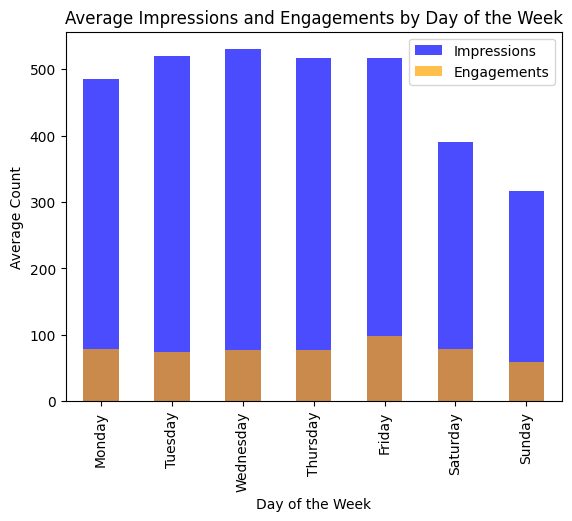

In [103]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week from the date
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Group the data by the day of the week and calculate the average impressions
avg_impressions_by_day = df.groupby('DayOfWeek')['Impressions'].mean()
avg_engagements_by_day = df.groupby('DayOfWeek')['Engagements'].mean()

# Plot the average impressions and engagements by day of the week on the same plot
fig, ax = plt.subplots()
avg_impressions_by_day.plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Impressions')
avg_engagements_by_day.plot(kind='bar', ax=ax, color='orange', alpha=0.7, label='Engagements')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Count')
ax.set_title('Average Impressions and Engagements by Day of the Week')
ax.legend()
plt.show()

In [146]:
# Assuming you have the dataset stored as a DataFrame called 'df'
# 'has_any_image' column indicates the presence of an image (1 for presence and 0 for absence)
# 'Engagements' column represents the level of engagement

# Group the data by the presence of an image and calculate the average engagement
image_engagement = df.groupby('has_any_image')['Engagements'].mean()
hashtag_engagement = df.groupby('has_any_hashtag')['Engagements'].mean()

# Calculate the overall average engagement
overall_engagement = df['Engagements'].mean()

# Compare the average engagement for posts with and without images
image_engagement_vs_overall = image_engagement / overall_engagement
hashtag_engagement_vs_overall = hashtag_engagement / overall_engagement

# Print the results
print("Average engagement for posts without image:", image_engagement.iloc[0])
print("Average engagement for posts with image:", image_engagement.iloc[1])
print("Engagement for posts with image compared to overall engagement:", image_engagement_vs_overall.iloc[1])

# Now Hashtags:
print("\n\nAverage engagement for posts without hashtags:", hashtag_engagement.iloc[0])
print("Average engagement for posts with hashtags:", hashtag_engagement.iloc[1])
print("Engagement for posts with at least one hashtag compared to overall engagement:", hashtag_engagement_vs_overall.iloc[1])

Average engagement for posts without image: 76.35592590758259
Average engagement for posts with image: 129.2949806949807
Engagement for posts with image compared to overall engagement: 1.6576096009663683


Average engagement for posts without hashtags: 105.23724811083123
Average engagement for posts with hashtags: 73.1033262561925
Engagement for posts with at least one hashtag compared to overall engagement: 0.9372117526411112


Takeaway is that a post with an image is on average at least 60% more "successfull" in comparison without one.

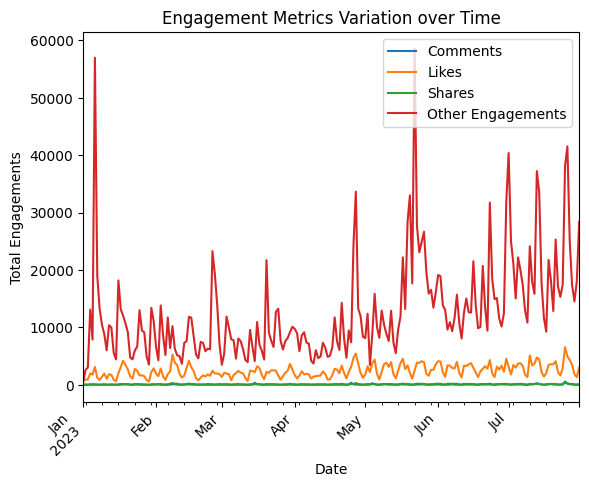

In [113]:
# Assuming your dataset is stored in a DataFrame called 'df'

# Convert the 'Date' column to datetime type if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the relevant columns for analysis
time_columns = ['Date']  # Choose either 'Date' or 'hour_posted' as per your preference

# Compute the total engagement for each time period (date or hour)
engagement_totals = df.groupby(time_columns)[engagement_metrics].sum()

# Plotting the engagement metrics over time
engagement_totals.plot()
plt.xlabel('Date')
plt.ylabel('Total Engagements')
plt.title('Engagement Metrics Variation over Time')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [120]:
# Group the data by date and calculate the total engagements, comments, likes, shares, etc.
engagement_by_date = df.groupby('Date')[['Engagements', 'Comments', 'Likes', 'Shares']].sum()

# Group the data by hour of posting and calculate the total engagements, comments, likes, shares, etc.
engagement_by_hour = df_agg.groupby('hour_posted')[['Engagements', 'Comments', 'Likes', 'Shares']].sum()

# Calculate the average engagement, comments, likes, shares, etc. per post by date
average_engagement_by_date = df.groupby('Date')[['Engagements', 'Comments', 'Likes', 'Shares']].mean()

# Calculate the average engagement, comments, likes, shares, etc. per post by hour of posting
average_engagement_by_hour = df_agg.groupby('hour_posted')[['Engagements']].mean()
average_impressions_by_hour = df_agg.groupby('hour_posted')[['Impressions']].mean()

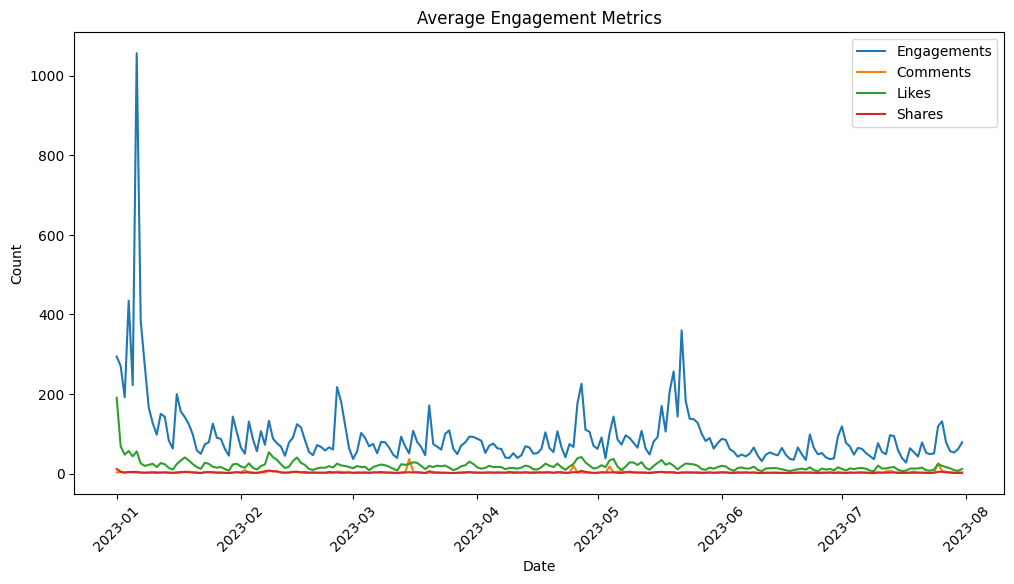

In [117]:
# Create a line plot for engagement metrics by date
plt.figure(figsize=(12, 6))
plt.plot(average_engagement_by_date.index, average_engagement_by_date['Engagements'], label='Engagements')
plt.plot(average_engagement_by_date.index, average_engagement_by_date['Comments'], label='Comments')
plt.plot(average_engagement_by_date.index, average_engagement_by_date['Likes'], label='Likes')
plt.plot(average_engagement_by_date.index, average_engagement_by_date['Shares'], label='Shares')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Average Engagement Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.show()

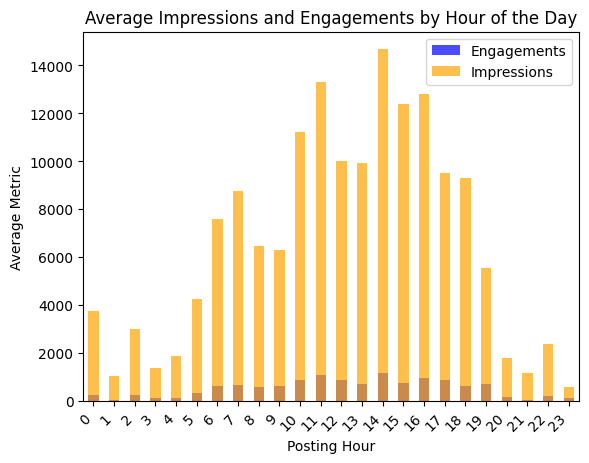

In [124]:
# Plot the average impressions and engagements by day of the week on the same plot
fig, ax = plt.subplots()
average_engagement_by_hour.plot(kind='bar', ax=ax, color='blue', alpha=0.7, label='Engagements')
average_impressions_by_hour.plot(kind='bar', ax=ax, color='orange', alpha=0.7, label='Impressions')
#ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Posting Hour')
ax.set_ylabel('Average Metric')
ax.set_title('Average Impressions and Engagements by Hour of the Day')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

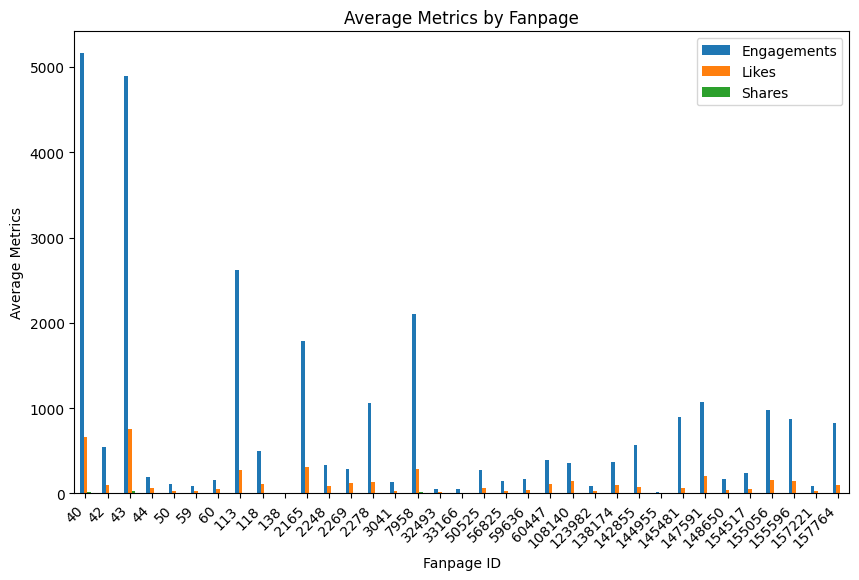

Fanpage with maximum average engagements: 40
Fanpage with maximum average likes: 43
Fanpage with maximum average shares: 43


In [128]:
# Group the data by the fanpage_id and calculate the average metrics
fanpage_metrics = df_agg.groupby("fanpage_id")[['Engagements', 'Likes', 'Shares']].mean()
fanpage_metrics.index = fanpage_metrics.index.astype(int)
# Identify the fanpage(s) with the highest average engagements
max_engagements = fanpage_metrics["Engagements"].idxmax()
max_likes = fanpage_metrics["Likes"].idxmax()
max_shares = fanpage_metrics["Shares"].idxmax()

plt.figure(figsize=(10, 6))
g = sns.histplot(df_agg['fanpage_id'], stat='count')
plt.xticks(rotation = 45)
plt.title('Allignment of posts by Fanpage')
plt.xlabel('Fanpage ID')
plt.ylabel('Probability')
# set the ticks first
g.set_yticks(range(0, 1000, 50))
plt.show()

# # Create bar plots to visualize the average metrics for each fanpage
# fanpage_metrics[["Engagements", "Likes", "Shares"]].plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Fanpage ID")
# plt.xticks(rotation=45, ha='right')
# plt.ylabel("Average Metrics")
# plt.title("Average Metrics by Fanpage")
# plt.legend(["Engagements", "Likes", "Shares"])
# plt.show()

# Print the fanpage(s) with the highest average engagements
print("Fanpage with maximum average engagements:", max_engagements)
print("Fanpage with maximum average likes:", max_likes)
print("Fanpage with maximum average shares:", max_shares)

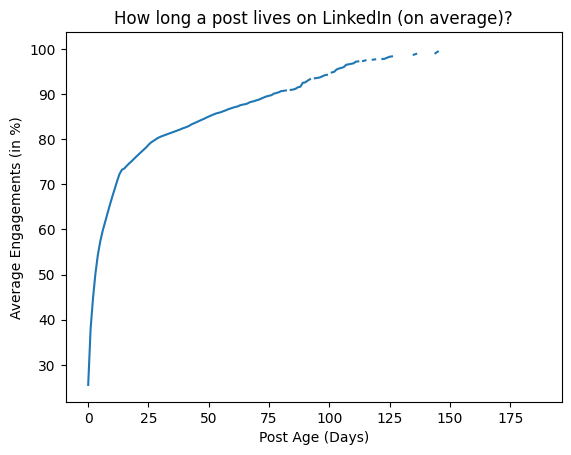

In [135]:
df_july = df.loc[pd.to_datetime(df['Published Date']).dt.month == 7,]
combined_df = df_july.sort_values('Date').groupby(['client_id', 'post_id', 'Date'])[['Impressions', 'Engagements']].sum()
combined_df['cumsum_imps'] = combined_df.groupby(level=1)['Impressions'].cumsum() / combined_df['Impressions'].groupby(level=1).sum()
combined_df['cumsum_engs'] = combined_df.groupby(level=1)['Engagements'].cumsum() / combined_df['Engagements'].groupby(level=1).sum()
combined_df['days_past'] = combined_df.groupby(level=1).cumcount() + 1 
df_plot = combined_df[['cumsum_imps', 'cumsum_engs', 'days_past']].groupby(['days_past']).mean()

# plot lines
plt.figure(figsize=(10, 6))
plt.plot(df_plot.index, df_plot['cumsum_imps'], label = "Impressions distribution")
plt.plot(df_plot.index, df_plot['cumsum_engs'], label = "Engagements distribution")
plt.xlabel('Days Count since posted')
plt.ylabel('Cumsum in % of collected value (mean over posts)')
plt.legend()
plt.show()

# Group the posts by post age and calculate the average engagement for each age
# avg_engagement = df.groupby('days_since_posted')['Engagements'].mean()
# total_engagement = avg_engagement.sum()

# # Calculate the percentage of all engagements for each age
# percentage_engagement = (avg_engagement / total_engagement) * 100
# cumulative_percentage = percentage_engagement.cumsum()

# # Plot the age of the post against the average engagement
# plt.plot(avg_engagement.index, cumulative_percentage.values)
# plt.xlabel('Post Age (Days)')
# plt.ylabel('Average Engagements (in %)')
# plt.title('How long a post lives on LinkedIn (on average)?')
# #plt.xlim(0, 45)  # Set the x-axis limit to 0 and 45 days
# plt.show()

In [137]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vladi\AppData\Roaming\nltk_data...


True

In [139]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create a function to get the sentiment score for each post's text
def get_sentiment_score(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Apply the sentiment analysis function on the 'text_clean_and_translated' column
df['sentiment_score'] = df_agg['text_clean_and_translated'].apply(get_sentiment_score)

# Determine the overall sentiment of the posts
positive_posts = df[df['sentiment_score'] > 0]
negative_posts = df[df['sentiment_score'] < 0]
neutral_posts = df[df['sentiment_score'] == 0]

# Calculate the percentages of positive, negative, and neutral posts
positive_percentage = round(len(positive_posts) / len(df_agg) * 100, 2)
negative_percentage = round(len(negative_posts) / len(df_agg) * 100, 2)
neutral_percentage = round(len(neutral_posts) / len(df_agg) * 100, 2)

# Print the results
print(f"Positive posts percentage: {positive_percentage}%")
print(f"Negative posts percentage: {negative_percentage}%")
print(f"Neutral posts percentage: {neutral_percentage}%")

Positive posts percentage: 91.4%
Negative posts percentage: 4.72%
Neutral posts percentage: 3.88%


In [141]:
# Calculate the average impressions and engagements for each sentiment category
neg_avg_impressions = df.loc[df['sentiment_score'] < 0, 'Impressions'].mean()
neg_avg_engagements = df.loc[df['sentiment_score'] < 0, 'Engagements'].mean()

pos_avg_impressions = df.loc[df['sentiment_score'] > 0, 'Impressions'].mean()
pos_avg_engagements = df.loc[df['sentiment_score'] > 0, 'Engagements'].mean()

neutral_avg_impressions = df.loc[df['sentiment_score'] == 0, 'Impressions'].mean()
neutral_avg_engagements = df.loc[df['sentiment_score'] == 0, 'Engagements'].mean()

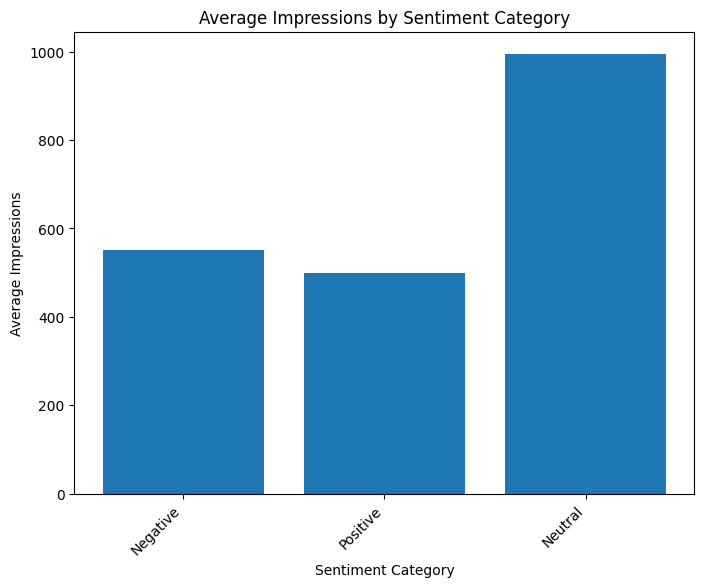

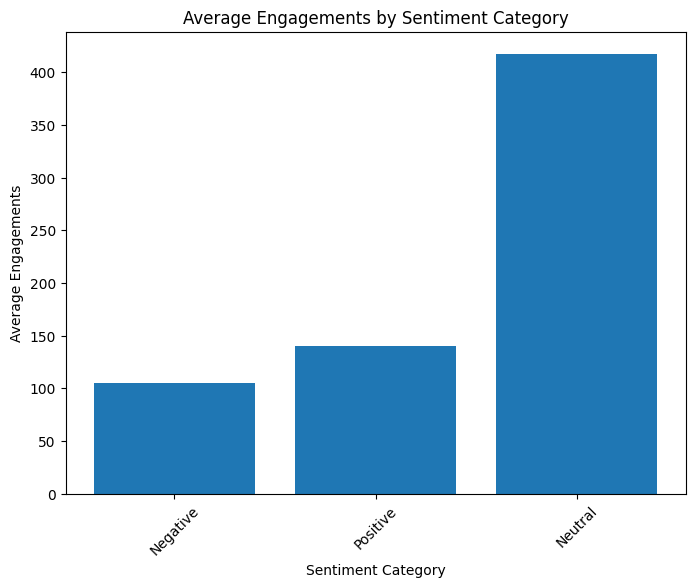

In [144]:
# Data for average impressions and engagements
categories = ['Negative', 'Positive', 'Neutral']
impressions = [neg_avg_impressions, pos_avg_impressions, neutral_avg_impressions]
engagements = [neg_avg_engagements, pos_avg_engagements, neutral_avg_engagements]

# Create a bar plot for average impressions
plt.figure(figsize=(8, 6))
plt.bar(categories, impressions)
plt.xlabel('Sentiment Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Impressions')
plt.title('Average Impressions by Sentiment Category')
plt.show()

# Create a bar plot for average engagements
plt.figure(figsize=(8, 6))
plt.bar(categories, engagements)
plt.xlabel('Sentiment Category')
plt.xticks(rotation=45, ha='center')
plt.ylabel('Average Engagements')
plt.title('Average Engagements by Sentiment Category')
plt.show()

Trend Coefficients: [0.00206178 1.80708578]


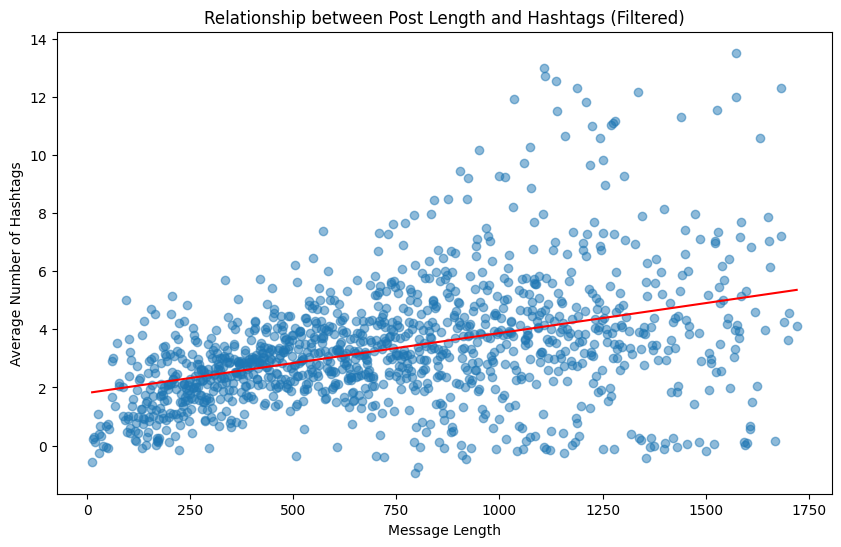

In [154]:
# Calculate z-score for message length
z_scores = (df_agg['post_len'] - df_agg['post_len'].mean()) / df_agg['post_len'].std()


# Define threshold for filtering outliers
threshold = 3  # Adjust this value based on your requirements

# Filter out posts with message length beyond the threshold
filtered_data = df_agg[z_scores < threshold]

filtered_data.loc[:, 'num_hashtags'] = filtered_data['hashtags'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Calculate average number of hashtags for filtered data
filtered_avg_hashtags = filtered_data.groupby('post_len')['num_hashtags'].mean()

noise = np.random.normal(0, 0.3, len(filtered_avg_hashtags))  # Adding noise

# Plot the relationship between post length and average number of hashtags:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_avg_hashtags.index, filtered_avg_hashtags.values + noise, alpha=0.5)
# Adding a trend line
coefficients = np.polyfit(filtered_avg_hashtags.index, filtered_avg_hashtags.values, 1)  # Linear regression
line = np.poly1d(coefficients)
x_vals = range(int(min(filtered_avg_hashtags.index)), int(max(filtered_avg_hashtags.index)+1))
print("Trend Coefficients:", coefficients)
plt.plot(x_vals, line(x_vals), color='red')
plt.xlabel('Message Length')
plt.ylabel('Average Number of Hashtags')
plt.title('Relationship between Post Length and Hashtags (Filtered)')
plt.show()

The slope coefficient (0.00206178) indicates that for every unit increase in the post length, there is an expected increase of approximately 0.0021 in the number of hashtags used. This suggests a positive relationship between post length and the number of hashtags.

The intercept coefficient (1.80708578) represents the expected number of hashtags used when the post length is zero. However, in the context of this analysis, it may not have a practical interpretation since it is unlikely to have a post with zero length.

Overall, the interpretation suggests that as the length of a post increases, there is a tendency for the number of hashtags used to also incr.ease

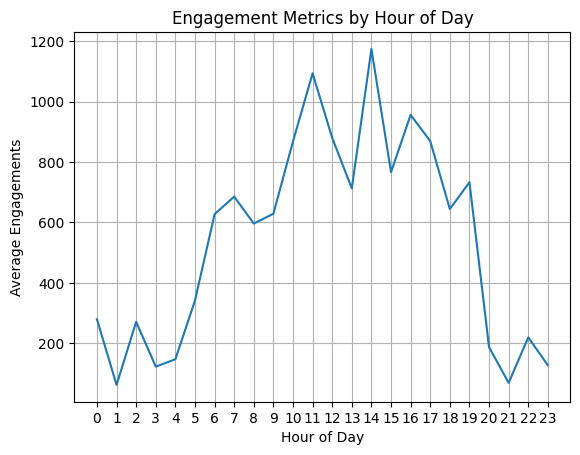

In [156]:
# Grouping the data by hour and calculating the average of the engagements
hourly_engagement = df_agg.groupby('hour_posted')['Engagements'].mean()

# Creating a line plot to visualize the trend
plt.plot(hourly_engagement)
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagements')
plt.title('Engagement Metrics by Hour of Day')
plt.xticks(range(24))  # Setting x-axis ticks as the 24 hours of the day
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Assuming 'Date' represents the date of the post and 'engagements' represents the number of engagements

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by date and calculate the total engagements for each date
daily_engagements = df.groupby('Date')['Engagements'].sum()

# Plotting a line plot to visualize the trend
plt.plot(daily_engagements)
plt.xlabel('Date')
plt.ylabel('Total Engagements')
plt.title('Engagement Metrics Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
# Impressions
df['log_impressions'] = np.log(df['Impressions'])
plt.figure(figsize=(10, 6))
plt.hist(df['log_impressions'], bins=20, edgecolor='black')
plt.title(f'Histogram of Log Impressions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# now boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['log_impressions'])
plt.title(f'Box Plot of Log Impressions')
plt.ylabel('Value')
plt.show()

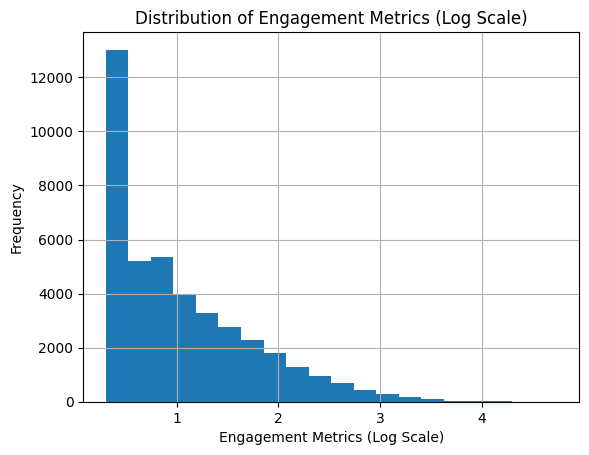

In [163]:
# Engagements
df['log_engagements'] = np.log(df['Engagements'])
plt.figure(figsize=(10, 6))
plt.hist(df['log_engagements'], bins=20, edgecolor='black')
plt.title(f'Histogram of Log Engagements')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
# now boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['log_engagements'])
plt.title(f'Box Plot of Log Engagements')
plt.ylabel('Value')
plt.show()

Overall, a left-skewed histogram of engagement metrics indicates that the majority of posts have relatively lower engagement levels, with a few outperforming posts that exhibit high engagement

# Outlier Detection (DBSCAN)

In [ ]:
# Assuming 'data' is a pandas DataFrame
clustering = DBSCAN(eps=0.5, min_samples=15).fit(df[['log_impressions', 'log_engagements']])
outliers = clustering.labels_ == -1
outlier_ids_dbscan = df.loc[outliers, 'ID'].unique()
df.loc[outliers, :]

# Insights and Conclusion

During the data cleaning we found and tried to explain following anomalies:
- Handling invalid post ids collected from the LinkedIn API, generating missing ids
- Handling posts with missing message text
- Data deduplication
- Normalizing Engagement Rate of aggregated posts

Then on the cleaned dataset descriptive columns were further analyzed. After applying descriptive metrics on the numeric column, we found out that daily measurements as well as grouped posts are unequally distrubited with a huge gap between max values and their 75% quantiles.

During data exploration, we had to conclude that we deal with an imbalanced dataset, since some companies may flood with posts, while other accounts posting rather occasionally. For balancing the dataset, we calculated class weights, which will be further applied whils computing LDA and predictive modelling.

Also, we found out how daily measurements are distributed along the weekdays (count of measurements) and those distributions explained by the sum of aggregated posts' metrics (Impressions and Engagements). We observed exceeding peaks on the beginning of the week and falling number of user activity during the middle of the week with the slight grow on Sunday. This information may help to identify best weekday for content posting.

Added to the strategy of choosing the best week day, when a post may be published, we observed, how long a post usually "lives" on LinkedIn, so we found that on average a post achieves over 90% of impressions or engagements during the first 10 days after its publication, after we saw an exponent fall till 100% on the 25th day.

Since we work with aggregated columns (Impressions and Engagements), we will scale it down via natural logarithm in order to reduce the gap between observations.

On the normalized values, we furhter analyzed, how our main metrics are distributed. So, we concluded, that normalized impressions are leftskewed and engagements show, on the other hand, rightskewed distribution.

Furhter we applied DBSCAN method in order to filter out outliers from the dataset based on the (new) normalized Engagements and Impressions. This is done in order to reduce possible impact of outliers by training sensitive predictive models in the future.

In [ ]:
df.to_csv(os.path.join(os.getenv('SAVE_INTERIM_FILES_PATH'), 'data_message_texts_ready_to_topic_modelling.csv'), encoding='utf-8')